## Data Preparation Report for "What kind of cars sell the worst?" Dataset

- **Author:** Anthony Bäckström
- **Date:** 29.10.2023
- **Last Update:** 9.11.2023

## Objective

The primary objective of this phase is to prepare a clean, high-quality dataset derived from "used_cars_data.csv", focusing on the cars' sales performance.

## Data Import

The initial step involved importing the dataset, which was conveniently provided in the CSV format. The file named **used_cars_data.csv** was accessed and loaded into our Python environment. As we embarked on this stage, we were met with a warning indicating mixed types in the **dealer_zip** column, highlighting the inherent complexity and diversity of data types present in our dataset.

In [ ]:
import pandas as pd
from tqdm import tqdm

def load_data(file_name):
    df_iter = pd.read_csv(file_name, dtype={"dealer_zip": str}, low_memory=False, iterator=True, chunksize=1000)
    df = pd.concat(tqdm(df_iter, desc="Loading Data"))
    return df

df = load_data('used_cars_data.csv')

## Data Inspection

Let's take a look at the first few rows to understand the data.

In [ ]:
print(df.head())
print(df.info())




- All the information we get from this data, we see what the data looks like and what the data types are. From here we start to extract the most important columns that will make research easier-
- The most important for us here are: **body_type**, **city**, **daysonmarket**, **dealer_zip**,**engine_cylinders**, **engine_displacement**, **engine_type**, **fuel_type**, **has_accidents**, **horsepower**, **make_name**, **mileage**, **model_name**, **price**, **transmission**, **year**

## Data Selection

- Our primary goal is to identify the types of cars that are slow-moving in sales. To achieve this, it's crucial to ensure we're working with the most pertinent data.
- This selective approach ensures that the dataset is not just vast but valuable, providing clarity and a more straightforward pathway to insights.

In [ ]:
# Create a new DataFrame with just the specified columns
df_cleaned = df.loc[:, [
    'body_type', 'city', 'daysonmarket', 'dealer_zip', 
    'engine_cylinders', 'engine_displacement', 'engine_type', 
    'fuel_type', 'has_accidents', 'horsepower', 
    'make_name', 'mileage', 'model_name', 'price', 
    'transmission', 'year'
]].copy()

## Data Cleaning Data

- Upon a comprehensive review of the dataset, we identified several data quality issues that needed addressing:
- Missing Values: Many columns had missing data. A strategy was employed to replace these missing values. For numerical columns, the mean of the column was used as a placeholder. For categorical columns or strings, 'median' and 'mode' was utilized as a placeholder, ensuring no loss of row data and maintaining data consistency.
- Convert 'has_accidents' from Yes/No to True/False

In [ ]:
# Convert 'has_accidents' from Yes/No to True/False
df_cleaned['has_accidents'] = df_cleaned['has_accidents'].replace({'Yes': True, 'No': False}).astype(bool)

# For numerical columns, fill missing values with the median
# For categorical columns, fill missing values with the mode
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in ['float64', 'int64']:
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
    elif df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)


# Now save the DataFrame without any scaling or rounding
df_cleaned.to_csv('cleaned_worst_cars_data.csv', index=False)

## Data formatting

Data formatting is the process of transforming data into a structure that is suitable for your specific purposes, such as analysis, reporting, or input into a system. The next steps in data formatting include:

- Consistency Check: Ensure that all data follows the same format. For example, dates should be in the same date format, categorical variables should have consistent casing (all lower case, for example), and numeric fields should be in the same unit of measurement.

In [ ]:
import pandas as pd

# Load the cleaned data
df_formatted = pd.read_csv('cleaned_worst_cars_data.csv')

# Ensure consistent casing for categorical data
categorical_columns = df_formatted.select_dtypes(include=['object']).columns
df_formatted[categorical_columns] = df_formatted[categorical_columns].apply(lambda x: x.str.lower())

print(df_formatted.head())
print(df_formatted.dtypes)

# Save the formatted DataFrame
df_formatted.to_csv('cleaned_worst_cars_data.csv', index=False)

## Visualization of cleaned data

The cleaned data has been successfully loaded, and we can see several attributes for each car listed. To answer the question "What kind of cars sell the worst?" we will consider **daysonmarket** as a primary indicator of how well a car sells—the longer a car stays on the market, the worse it is selling.

Let’s start with the descriptive statistics and grouped analysis. After that, we can create some visualizations to better understand the data

### Descriptive Statistics for 'daysonmarket':

- The average days on market for all vehicles is approximately 76.06 days.
- The median days on market is 35 days, indicating that half of the cars sell faster than this, and half take longer.
- The standard deviation is quite large at about 108.88 days, suggesting significant variation in how long cars stay on the market.
- The maximum days on market is 3,599, which is an extreme outlier.

In [ ]:
# Descriptive Statistics for 'daysonmarket'
descriptive_stats_daysonmarket = df['daysonmarket'].describe()
print(descriptive_stats_daysonmarket)


    count    3.000040e+06
    mean     7.605973e+01
    std      1.088839e+02
    min      0.000000e+00
    25%      1.400000e+01
    50%      3.500000e+01
    75%      8.200000e+01
    max      3.599000e+03
    Name: daysonmarket, dtype: float64


### Grouped Analysis by 'body_type':

- Vans, on average, stay on the market the longest (mean of approximately 114 days), with the median at 57 days.
- Convertibles and Hatchbacks also take longer to sell than average.
- SUVs/Crossovers and Sedans, which are more common vehicle types, have a lower average days on market, closer to the overall median.

In [ ]:
# Grouped Analysis by 'body_type'
grouped_by_body_type = df.groupby('body_type')['daysonmarket'].describe()
print(grouped_by_body_type)


                        count        mean         std  min   25%   50%    75%  \
        body_type                                                                    
    Convertible        26010.0   89.436717  157.092304  0.0  15.0  37.0   85.0   
    Coupe              71607.0   73.508833  129.492471  0.0  13.0  30.0   70.0   
    Hatchback          88374.0   82.000453  109.379365  0.0  15.0  42.0  104.0   
    Minivan            79802.0   77.664733  110.708673  0.0  17.0  41.0   83.0   
    Pickup Truck      474595.0   70.478777  108.800453  0.0  14.0  33.0   70.0   
    SUV / Crossover  1429945.0   77.317735  104.782323  0.0  14.0  36.0   85.0   
    Sedan             742036.0   73.899588  109.033102  0.0  15.0  36.0   78.0   
    Van                47166.0  113.999809  141.635432  0.0  22.0  57.0  176.0   
    Wagon              40505.0   72.229873  111.847115  0.0  14.0  35.0   76.0   

        max  
    body_type                
    Convertible      3573.0  
    Coupe            2957.0  
    Hatchback        2915.0  
    Minivan          3599.0  
    Pickup Truck     3337.0  
    SUV / Crossover  2669.0  
    Sedan            2979.0  
    Van              2315.0  
    Wagon            2067.0  


### Grouped Analysis by 'make_name':

- The makes like Pininfarina, Franklin, and Daewoo have very high average days on market, but these are based on very few listings (low count), which could be due to those makes being rare or specialized vehicles.
- Common makes like Ford, Toyota, or Honda are not in the top 10 for the worst selling, suggesting that they sell relatively quicker.

In [ ]:
# Grouped Analysis by 'make_name'
grouped_by_make_name = df.groupby('make_name')['daysonmarket'].describe()
print(grouped_by_make_name.head(10))  # Adjust the number as needed to see more or fewer makes


                 count        mean         std    min    25%    50%    75%  \
    make_name                                                                    
    AM General        21.0  198.047619  350.148180    1.0   24.0   75.0  135.0   
    AMC               17.0  164.176471  262.507437    3.0   30.0   64.0  167.0   
    Acura          30603.0   68.843577  105.189584    0.0   15.0   34.0   65.0   
    Alfa Romeo      4401.0   86.735969  114.452480    0.0   15.0   35.0  126.0   
    Allard             1.0   64.000000         NaN   64.0   64.0   64.0   64.0   
    Ariel              1.0  265.000000         NaN  265.0  265.0  265.0  265.0   
    Aston Martin     601.0  173.351082  166.582447    0.0   40.0  129.0  252.0   
    Audi           36370.0   66.514462   91.420633    0.0   14.0   34.0   76.0   
    Austin             1.0  271.000000         NaN  271.0  271.0  271.0  271.0   
    Austin-Healey      6.0  233.000000  203.897033   47.0   71.5  215.5  286.0   

                  max  
    make_name              
    AM General     1449.0  
    AMC            1070.0  
    Acura          2150.0  
    Alfa Romeo     1252.0  
    Allard           64.0  
    Ariel           265.0  
    Aston Martin   1498.0  
    Audi           1667.0  
    Austin          271.0  
    Austin-Healey   587.0  


Now, let's visualize these findings to make them more digestible.

### Boxplot - Days on Market by Body Type:

- The boxplot shows that vans have a wider interquartile range (IQR), suggesting more variability in how long they take to sell. Convertibles and hatchbacks also have a higher median and IQR compared to other body types like sedans and SUVs/Crossovers, which are more tightly grouped around a lower median.

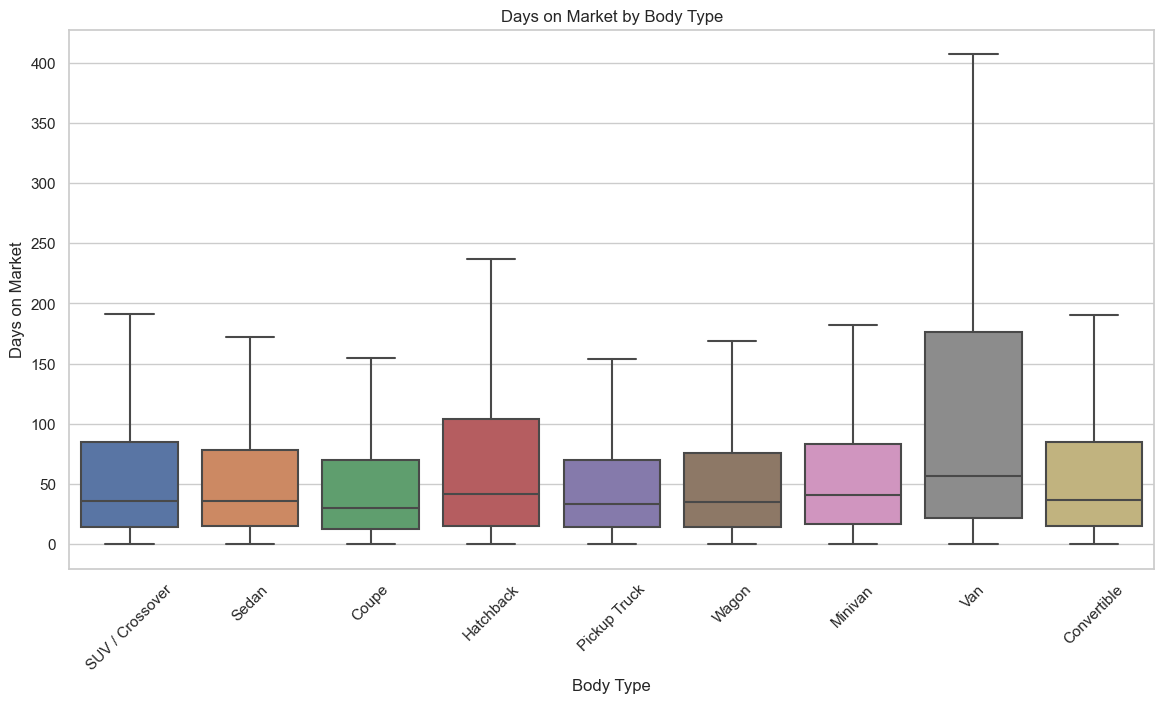

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Load the cleaned data with low_memory set to False
df = pd.read_csv('cleaned_worst_cars_data.csv', low_memory=False)


# Boxplot to compare 'daysonmarket' for different 'body_types'
plt.figure(figsize=(14, 7))
sns.boxplot(x='body_type', y='daysonmarket', data=df, showfliers=False)
plt.title('Days on Market by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Days on Market')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

###  Bar Plot - Average Days on Market for Top 10 Worst Selling Makes:

- This plot highlights the makes with the highest average days on market. The makes like Pininfarina and Franklin have a significantly higher average days on market, but as noted, this could be influenced by the low number of listings. More common makes are not present in this list, suggesting they may sell more quickly on average.

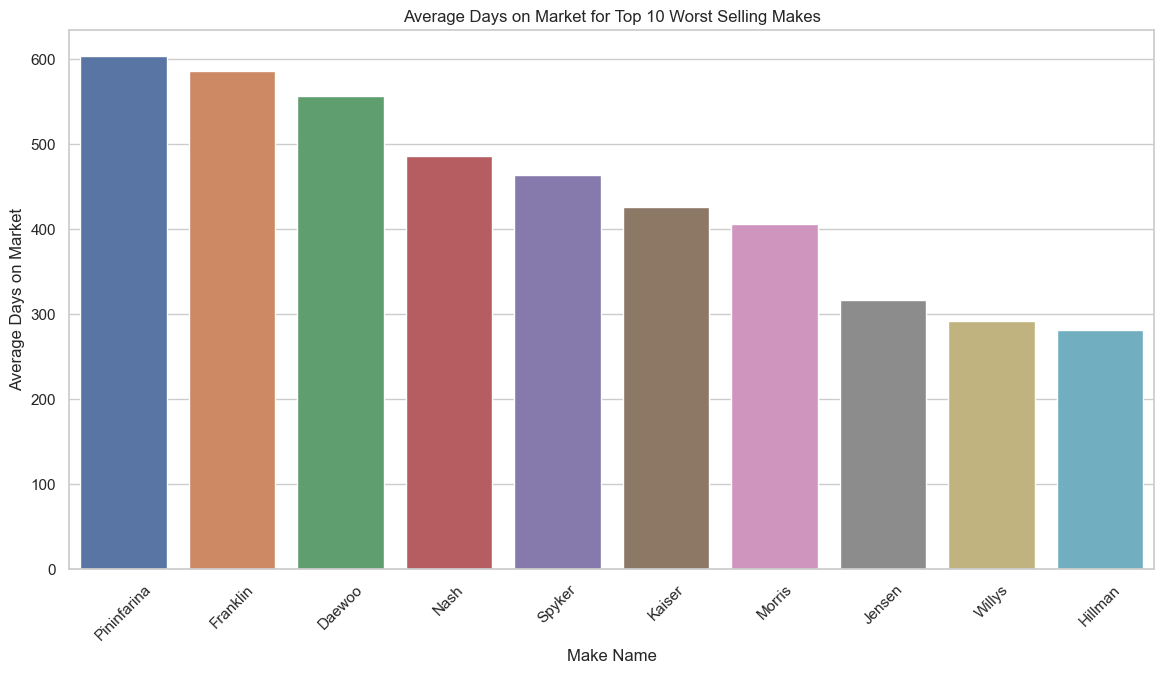

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# if the data cannot be read
# df = pd.read_csv('cleaned_worst_cars_data.csv', low_memory=False)

# Group the data by 'make_name' and calculate the mean of 'daysonmarket'
grouped_make_name = df.groupby('make_name')['daysonmarket'].mean().sort_values(ascending=False).reset_index()

# Now that grouped_make_name is defined, get the top 10 makes with the worst selling record
top_worst_selling_makes = grouped_make_name.head(10)

# Bar plot to show the average 'daysonmarket' for the top 10 worst selling makes
plt.figure(figsize=(14, 7))
sns.barplot(x='make_name', y='daysonmarket', data=top_worst_selling_makes)
plt.title('Average Days on Market for Top 10 Worst Selling Makes')
plt.xlabel('Make Name')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=45)
plt.show()

### Heatmap - Different Numerical Variables

- The heatmap will show you how different numerical variables in your DataFrame correlate with each other. For instance, you could discover if higher-priced cars stay longer on the market or if newer cars sell faster.

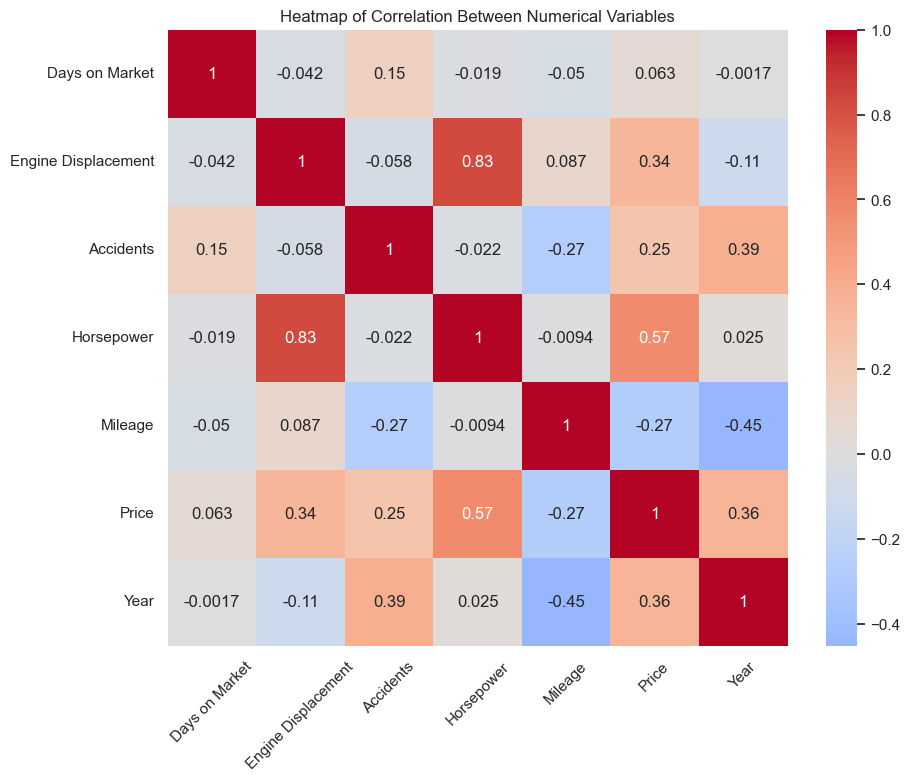

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a dictionary to map the current column names to more descriptive ones
column_names = {
    'daysonmarket': 'Days on Market',
    'engine_displacement': 'Engine Displacement',
    'horsepower': 'Horsepower',
    'mileage': 'Mileage',
    'price': 'Price',
    'year': 'Year',
    'has_accidents': 'Accidents' 
}

# Calculate the correlation matrix, explicitly considering only numeric columns
corr = df.corr(numeric_only=True)

# Rename the columns using the provided dictionary
corr.rename(columns=column_names, index=column_names, inplace=True)

# Generate a heatmap with the renamed columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Between Numerical Variables')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)   # Ensure the y-axis labels are horizontal for readability
plt.show()

### Bar Plot - Average Number of Days on the Market

This bar plot will visualize the average number of days on the market for cars by their model year. It can help identify if cars from certain years tend to sell worse than others.

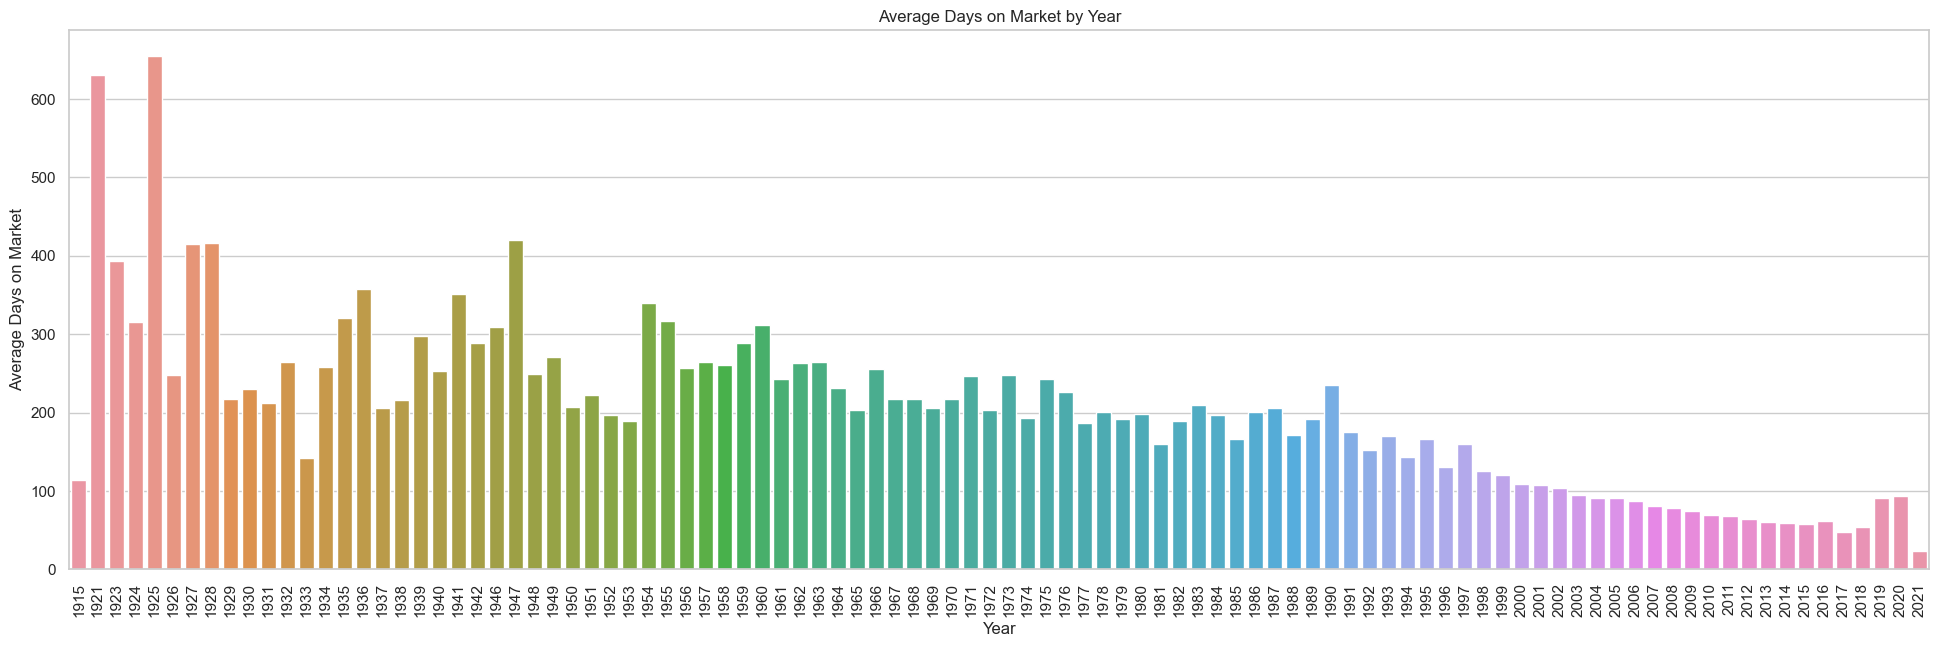

In [14]:
# Bar plot for average 'daysonmarket' by 'year'
plt.figure(figsize=(24, 7))
# Group by 'year' and calculate the mean of 'daysonmarket'
avg_days_by_year = df.groupby('year')['daysonmarket'].mean().reset_index()
sns.barplot(x='year', y='daysonmarket', data=avg_days_by_year)
plt.title('Average Days on Market by Year')
plt.xlabel('Year')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

### Histogram of Days on Market

- This can show the distribution of how long cars stay on the market before they are sold, which could reveal common timeframes or outliers.

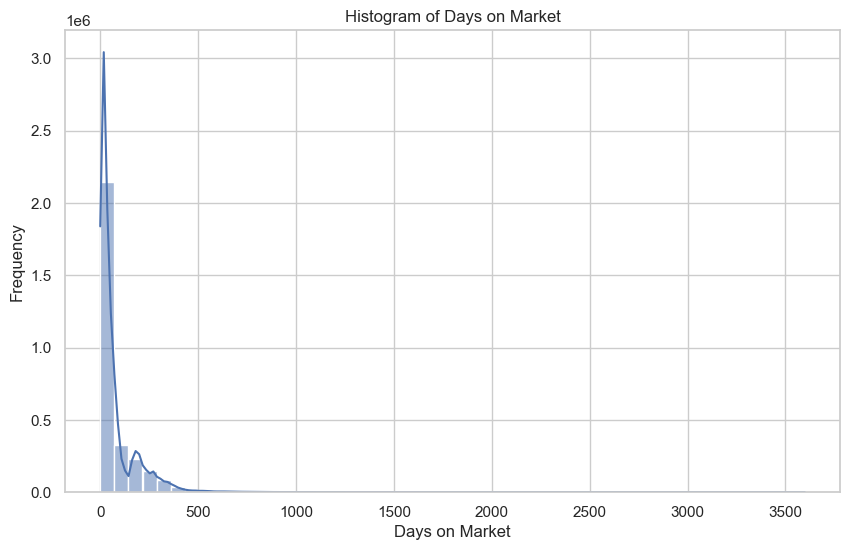

In [15]:
# Histogram of Days on Market
plt.figure(figsize=(10, 6))
sns.histplot(df['daysonmarket'], bins=50, kde=True)
plt.title('Histogram of Days on Market')
plt.xlabel('Days on Market')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot of Price vs. Days on Market

- This could help to see if there's a trend between the price of a car and how long it takes to sell.

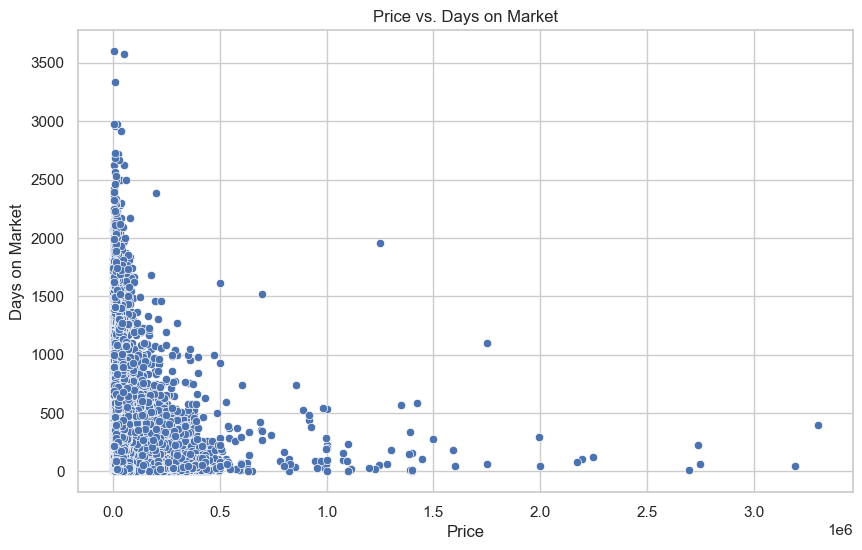

In [16]:
# Scatter Plot of Price vs. Days on Market
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='daysonmarket')
plt.title('Price vs. Days on Market')
plt.xlabel('Price')
plt.ylabel('Days on Market')
plt.show()

### Bar Plot of Average Days on Market by Fuel Type

- This could indicate if the type of fuel a car uses affects how quickly it sells.

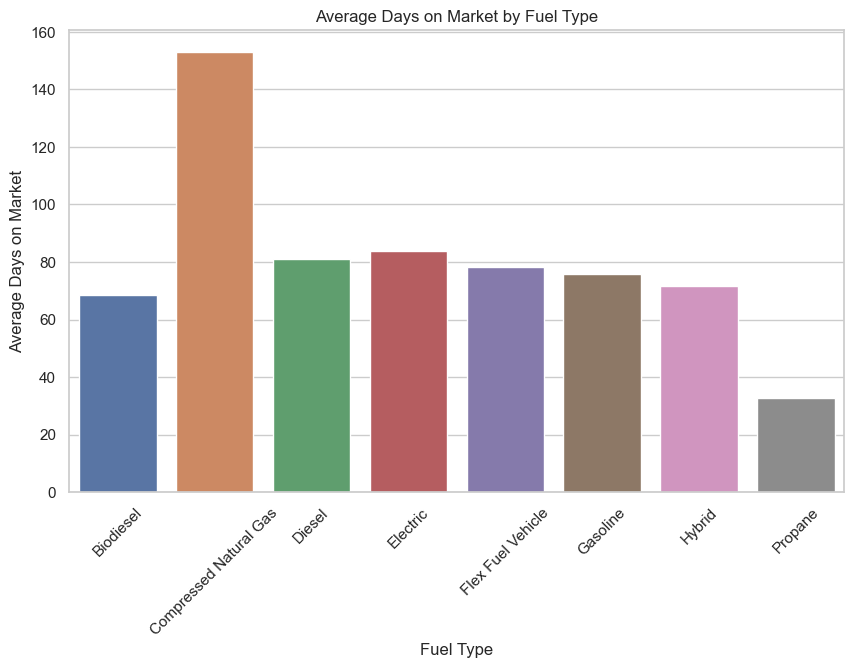

In [17]:
# Bar Plot of Average Days on Market by Fuel Type
plt.figure(figsize=(10, 6))
avg_days_by_fuel_type = df.groupby('fuel_type')['daysonmarket'].mean().sort_index()
sns.barplot(x=avg_days_by_fuel_type.index, y=avg_days_by_fuel_type.values)
plt.title('Average Days on Market by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=45)
plt.show()

### Count Plot of Cars by Body Type 

- This will show the distribution of different types of cars in your dataset, which can be useful to understand the sample sizes when looking at days on market by body type.

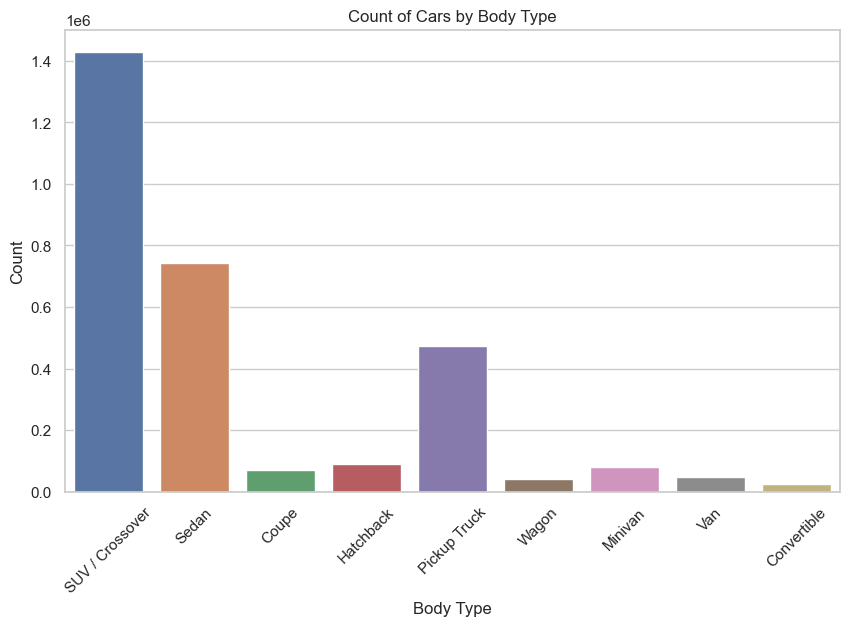

In [18]:
# Count Plot of Cars by Body Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='body_type')
plt.title('Count of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()